# Analyze & Share phase
##  Feature Selection

-The following methods will be used :

1. Correlation
2. Extra Trees Regressor
3. RFECV
4. Linear Regression
5. Lasso (L1 regularization)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('news_share_data_updated.csv')
print(df.shape)
df.head()

(1003, 32)


,cleaned_title,cleaned_text,weekday,is_weekend,month,month number,weekday number,title_tokens,text_tokens,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,1,1,7,195,Business,0,0,0,0,0,0.640816,5,3,1,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,0,5,12,108,Tech,0,0,0,0,1,0.549618,4,1,0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,0,5,15,517,Tech,0,0,0,0,1,0.577236,8,1,0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,0,5,6,283,Tech,0,0,0,0,1,0.525896,4,1,0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,0,5,10,282,Others,0,0,1,0,0,0.588889,6,9,0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


###  Extra Trees Regressor (feature_importance_)

In [2]:
df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'month number', 'weekday number', 'title_tokens', 'text_tokens',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [3]:
num_df = df.drop(columns = ['cleaned_title', 'cleaned_text','cleaned_data_channel','weekday','month'])
num_df.head(1)

,is_weekend,month number,weekday number,title_tokens,text_tokens,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,0,1,1,7,195,0,0,0,0,0,0.640816,5,3,1,4.579592,5,1459.5,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.02449,0.25,0.25,1600


In [4]:
x= num_df.drop(columns ='shares') #features
y= num_df['shares'] #label

In [5]:
#fitting the train data
from sklearn.ensemble import ExtraTreesRegressor
choose = ExtraTreesRegressor()
choose.fit(x,y)

ExtraTreesRegressor()

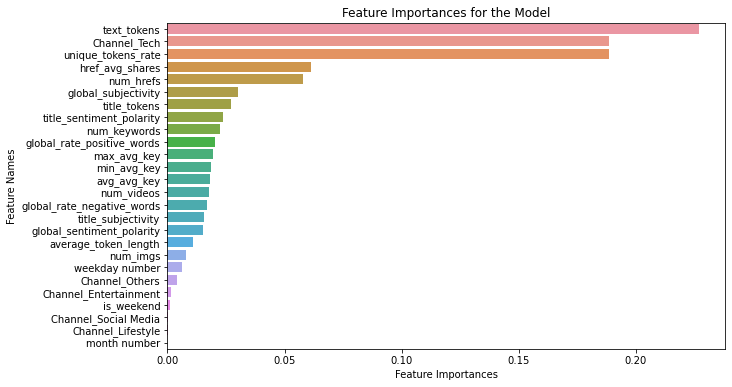

In [7]:
#showing in graph which are the important features we got..
feature_importances = choose.feature_importances_
feature_names = x.columns

# Create a DataFrame with feature importances and their corresponding names
sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sort the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature Importance', y='Feature Names', data=sorted_feature_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importances for the Model')
plt.show()

###  RFECV

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(num_df,y, test_size = 0.2)

# Create the RandomForestRegressor model
rfr = RandomForestRegressor()

# Create the RFECV model with the RandomForestRegressor
#The negative sign is used because RFECV always maximizes the scoring metric, but we typically want to minimize the MSE.
rfecv = RFECV(estimator = rfr, cv =5, scoring ='neg_mean_squared_error')

In [10]:
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

## Ensembling(Random Forest Regressor)

In [11]:
rfr.fit(X_train[selected_features], y_train)
y_pred = rfr.predict(X_test[selected_features])

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.3570868217765818


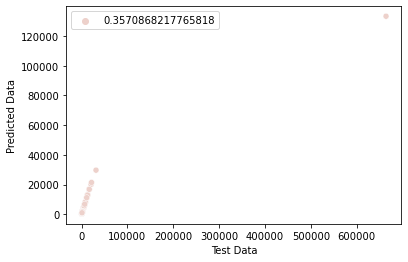

In [14]:
sns.scatterplot(x=y_test, y=y_pred, hue=r2,alpha=1)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

plt.show()